In [28]:
pip install "nbconvert[webpdf]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.9/583.9 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: greenlet
    Found existing installation: greenlet 3.0.3
    Uninstalling greenlet-3.0.3:
      Successfully uninstalled greenlet-3.0.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic_2d
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
import shap
from sklearn.inspection import PartialDependenceDisplay
import re
from sklearn.preprocessing import LabelEncoder

In [27]:
import psutil
import platform

# 获取 CPU 信息
cpu_name = platform.processor()
if not cpu_name:  # 某些系统上 processor 可能为空
    cpu_name = platform.uname().machine

# 获取内存信息（GB）
mem = psutil.virtual_memory()
mem_gb = round(mem.total / (1024**3), 1)

print(f"CPU: {cpu_name}")
print(f"Memory: {mem_gb} GB")


CPU: x86_64
Memory: 7.7 GB


In [4]:
London = gpd.read_file("/home/jovyan/work/data/ESRI/London_Borough_Excluding_MHW.shp")

In [5]:
path1 = '/home/jovyan/work/data/historical/dft-road-casualty-statistics-historical-revisions-data.csv'
historical=pd.read_csv(path1)
path2 = '/home/jovyan/work/data/collasion/last5year/dft-road-casualty-statistics-collision-adjustment-last-5-years.csv'
fiveyear=pd.read_csv(path2)

In [6]:
dtype_fix = {0: str, 2: str}
c_path1 = '/home/jovyan/work/data/casualty/single/dft-road-casualty-statistics-casualty-2019.csv'
casualty2019 =pd.read_csv(c_path1,dtype=dtype_fix)
c_path2 = '/home/jovyan/work/data/casualty/single/dft-road-casualty-statistics-casualty-2020.csv'
casualty2020=pd.read_csv(c_path2,dtype=dtype_fix)
c_path3 = '/home/jovyan/work/data/casualty/single/dft-road-casualty-statistics-casualty-2021.csv'
casualty2021=pd.read_csv(c_path3,dtype=dtype_fix) 
c_path4 = '/home/jovyan/work/data/casualty/single/dft-road-casualty-statistics-casualty-2022.csv'
casualty2022 =pd.read_csv(c_path4,dtype=dtype_fix)
c_path5 = '/home/jovyan/work/data/casualty/single/dft-road-casualty-statistics-casualty-2023.csv'
casualty2023 =pd.read_csv(c_path5,dtype=dtype_fix)
c_path6 = '/home/jovyan/work/data/casualty/single/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2024.csv'
casualty2024 =pd.read_csv(c_path6,dtype=dtype_fix)

In [85]:
casualty2019.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,enhanced_casualty_severity,casualty_distance_banding
0,2019010128300,2019,10128300,1,1,1,1,58,9,3,...,0,0,0,0,9,1,2,E01003175,-1,2
1,2019010128300,2019,10128300,1,2,2,2,-1,-1,3,...,0,1,0,0,9,1,5,E01003411,-1,3
2,2019010128300,2019,10128300,1,3,2,2,-1,-1,3,...,0,2,0,0,9,1,5,E01003413,-1,3
3,2019010152270,2019,10152270,1,1,1,2,24,5,3,...,0,0,0,0,9,1,3,E01003180,-1,1
4,2019010155191,2019,10155191,2,1,2,2,21,5,3,...,0,0,0,0,1,1,1,E01016964,-1,4


In [7]:
dtype_fix = {0: str, 2: str, 35: str}
dtype_fix1 = {1: str, 3: str}
col_path1 = '/home/jovyan/work/data/collasion/single/dft-road-casualty-statistics-collision-2019.csv'
collision2019=pd.read_csv(col_path1,dtype=dtype_fix)
col_path2 = '/home/jovyan/work/data/collasion/single/dft-road-casualty-statistics-collision-2020.csv'
collision2020=pd.read_csv(col_path2,dtype=dtype_fix)
col_path3 = '/home/jovyan/work/data/collasion/single/dft-road-casualty-statistics-collision-2021.csv'
collision2021=pd.read_csv(col_path3,dtype=dtype_fix)
col_path4 = '/home/jovyan/work/data/collasion/single/dft-road-casualty-statistics-collision-2022.csv'
collision2022=pd.read_csv(col_path4,dtype=dtype_fix)
col_path5 = '/home/jovyan/work/data/collasion/single/dft-road-casualty-statistics-collision-2023.csv'
collision2023=pd.read_csv(col_path5,dtype=dtype_fix)
col_path6 = '/home/jovyan/work/data/collasion/single/dft-road-casualty-statistics-collision-provisional-mid-year-unvalidated-2024.csv'
collision2024=pd.read_csv(col_path6,dtype=dtype_fix1)

In [279]:
collision2024.head()

,status,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag,lsoa_of_collision_location,enhanced_severity_collision
0,Unvalidated,2024010486807,2024,10486807,527188.0,184782.0,NaN,NaN,1,3,...,4,1,1,0,0,-1,3,-1,-1,-1
1,Unvalidated,2024010486821,2024,10486821,528936.0,194721.0,NaN,NaN,1,3,...,4,4,2,9,0,-1,3,-1,-1,-1
2,Unvalidated,2024010486824,2024,10486824,552699.0,185940.0,NaN,NaN,1,3,...,4,8,2,0,0,-1,1,-1,-1,-1
3,Unvalidated,2024010486825,2024,10486825,545623.0,177185.0,NaN,NaN,1,3,...,4,1,1,0,0,-1,1,-1,-1,-1
4,Unvalidated,2024010486828,2024,10486828,536554.0,178468.0,NaN,NaN,1,3,...,4,4,2,0,0,-1,1,-1,-1,-1


In [8]:
dtype_fix = {0: str, 2: str}
dtype_fix1 = {1: str, 3: str}
ve_path1 = '/home/jovyan/work/data/viechle/single/dft-road-casualty-statistics-vehicle-2019.csv'
viechle2019=pd.read_csv(ve_path1,dtype=dtype_fix)
ve_path2 = '/home/jovyan/work/data/viechle/single/dft-road-casualty-statistics-vehicle-2020.csv'
viechle2020=pd.read_csv(ve_path2,dtype=dtype_fix)
ve_path3 = '/home/jovyan/work/data/viechle/single/dft-road-casualty-statistics-vehicle-2021.csv'
viechle2021=pd.read_csv(ve_path3,dtype=dtype_fix)
ve_path4 = '/home/jovyan/work/data/viechle/single/dft-road-casualty-statistics-vehicle-2022.csv'
viechle2022=pd.read_csv(ve_path4,dtype=dtype_fix)
ve_path5 = '/home/jovyan/work/data/viechle/single/dft-road-casualty-statistics-vehicle-2023.csv'
viechle2023=pd.read_csv(ve_path5,dtype=dtype_fix)
ve_path6 = '/home/jovyan/work/data/viechle/single/dft-road-casualty-statistics-vehicle-provisional-mid-year-unvalidated-2024.csv'
viechle2024=pd.read_csv(ve_path6,dtype=dtype_fix1)

In [89]:
viechle2019.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver,escooter_flag,dir_from_e,dir_from_n,dir_to_e,dir_to_n,driver_distance_banding
0,2019010128300,2019,10128300,1,9,0,99,9,9,99,...,-1,2,1,E01003175,0,NaN,NaN,NaN,NaN,2
1,2019010128300,2019,10128300,2,9,0,99,9,9,99,...,-1,2,1,E01003175,0,NaN,NaN,NaN,NaN,2
2,2019010152270,2019,10152270,1,9,0,18,9,9,99,...,-1,3,1,E01003180,0,NaN,NaN,NaN,NaN,1
3,2019010152270,2019,10152270,2,9,0,18,9,9,99,...,-1,6,1,E01001160,0,NaN,NaN,NaN,NaN,1
4,2019010155191,2019,10155191,1,9,0,3,5,1,0,...,-1,4,1,E01031231,0,NaN,NaN,NaN,NaN,5


In [9]:
#合并数据single year变成2019到2024
casualty_list=[casualty2019, casualty2020,casualty2021,casualty2022,casualty2023,casualty2024]
casualty_19_24 = pd.concat(casualty_list, ignore_index=True)
collision_list=[collision2019,collision2020,collision2021,collision2022,collision2023,collision2024]
collision_19_24 = pd.concat(collision_list, ignore_index=True)
viechle_list=[viechle2019,viechle2020,viechle2021,viechle2022,viechle2023,viechle2024]
viechle_19_24 = pd.concat(viechle_list, ignore_index=True)

In [10]:
#清理无用的列
collision_19_24.drop(columns=['status',	'collision_index','longitude','latitude',	'collision_year',	'collision_reference','legacy_collision_severity',	'did_police_officer_attend_scene_of_collision',	'lsoa_of_collision_location'], inplace=True)


In [14]:
collision_19_24.tail()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
566786,NaN,NaN,NaN,250949.0,661474.0,99,NaN,1,1,06/06/2024,...,1,1,1,0,0,-1,NaN,-1,NaN,3
566787,NaN,NaN,NaN,261112.0,661378.0,99,NaN,1,1,15/06/2024,...,1,1,1,0,0,-1,NaN,-1,NaN,6
566788,NaN,NaN,NaN,294462.0,668629.0,99,NaN,2,1,16/06/2024,...,1,1,1,0,0,-1,NaN,-1,NaN,6
566789,NaN,NaN,NaN,373123.0,816111.0,99,NaN,1,1,29/05/2024,...,1,1,1,-1,-1,-1,NaN,-1,NaN,6
566790,NaN,NaN,NaN,271904.0,836997.0,99,NaN,1,1,22/06/2024,...,1,1,1,0,0,-1,NaN,-1,NaN,3


In [12]:
#数据清理
casualty6= casualty_19_24.dropna()
collision6= collision_19_24.dropna()
viechle6= viechle_19_24.dropna()

In [323]:
collision6_gdf = gpd.GeoDataFrame(
    collision6,
    geometry=gpd.points_from_xy(collision6['longitude'], collision6['latitude']),
    crs="EPSG:4326"  # WGS84 坐标系
)
London = London.to_crs(epsg=4326)
collision6 = collision6_gdf[collision6_gdf.within(London.geometry.union_all())]

In [326]:
collision6.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision,geometry
0,2019010128300,2019.0,10128300,528218.0,180407.0,-0.153842,51.508057,1,3.0,2,...,1,1,0,0,1,3.0,2,E01004762,-1,POINT (-0.15384 51.50806)
1,2019010152270,2019.0,10152270,530219.0,172463.0,-0.127949,51.436208,1,3.0,2,...,1,1,0,0,1,3.0,2,E01003117,-1,POINT (-0.12795 51.43621)
2,2019010155191,2019.0,10155191,530222.0,182543.0,-0.124193,51.526795,1,3.0,2,...,1,1,0,0,1,1.0,2,E01000943,-1,POINT (-0.12419 51.5268)
3,2019010155192,2019.0,10155192,525531.0,184605.0,-0.191044,51.546387,1,2.0,1,...,1,1,0,0,1,1.0,2,E01000973,-1,POINT (-0.19104 51.54639)
4,2019010155194,2019.0,10155194,524920.0,184004.0,-0.200064,51.541121,1,3.0,2,...,1,1,0,0,1,1.0,2,E01000546,-1,POINT (-0.20006 51.54112)


In [36]:
collision6 = collision6.to_crs(London.crs)



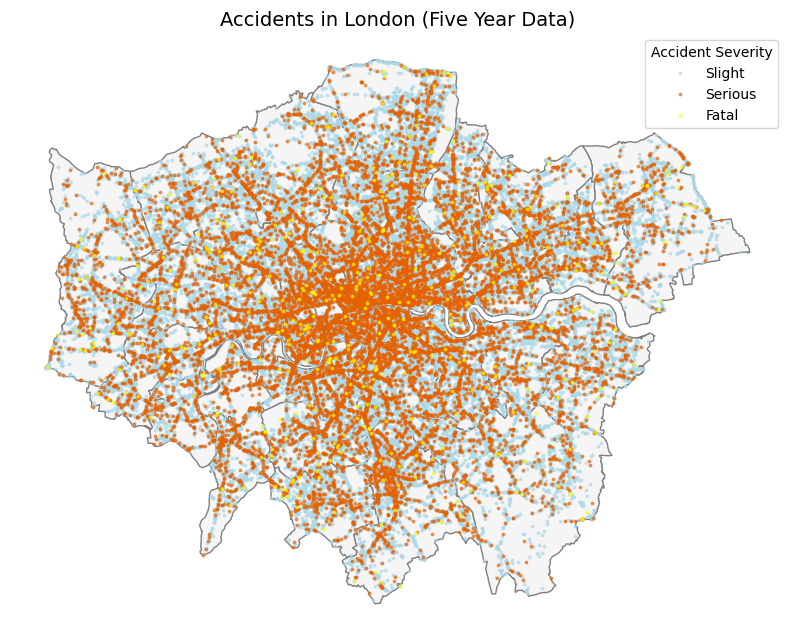

In [37]:
# 设置图形大小
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制伦敦底图
London.plot(ax=ax, color='#F5F5F5', edgecolor='gray')

# 设置颜色映射（文本为键）
severity_colors = {
    'Slight': '#ADD8E6',   # 淡蓝
    'Serious': '#e66101',  # 橙红
    'Fatal': '#FFFD00'     # 深紫
}

# 遍历每种严重等级绘制点图
for severity, color in severity_colors.items():
    subset = collision6[collision6['accident_severity'] == severity]
    subset = gpd.GeoDataFrame(subset, geometry='geometry', crs=collision6.crs)  # 保证是GeoDataFrame

    if not subset.empty:
        subset.plot(
            ax=ax,
            marker='o',
            color=color,
            markersize=3,
            alpha=0.6,
            label=severity
        )

# 添加图例和标题
plt.legend(title='Accident Severity')
plt.title("Accidents in London (Five Year Data)", fontsize=14)
plt.axis('off')
plt.show()


In [26]:
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
collision6 = merged_all.copy()
collision6['accident_severity'] = collision6['accident_severity'].map(severity_mapping)
severity_counts = collision6.groupby(['accident_year', 'accident_severity']).size().unstack(fill_value=0)
severity_counts = severity_counts.astype(int)



KeyError: 'accident_year'

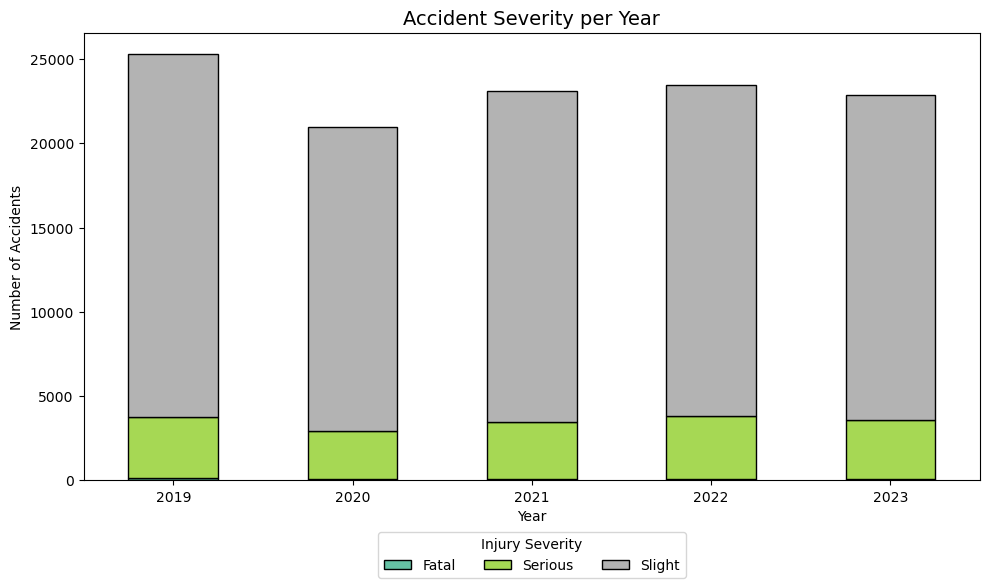

In [328]:
severity_counts.index = severity_counts.index.astype(int)

# 绘制堆叠柱状图
severity_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', edgecolor='black')

plt.title("Accident Severity per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title='Injury Severity', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [299]:
severity_counts = collision6.groupby(['accident_year', 'accident_severity']).size().unstack(fill_value=0)

# 检查数据类型
print(severity_counts.dtypes)

# 如果不是数字，转成 int
severity_counts = severity_counts.astype(int)


Series([], dtype: object)


In [15]:

def preprocess_table(df, cols, id_cols):
    df_sub = df[cols].dropna().copy()
    for col in df_sub.columns:
        if col not in id_cols and df_sub[col].dtype == 'object':
            df_sub[col] = LabelEncoder().fit_transform(df_sub[col])
    return df_sub


In [16]:
casualty_clean = preprocess_table(
    casualty_19_24,
    ['accident_index', 'vehicle_reference', 'age_band_of_casualty'],
    ['accident_index', 'vehicle_reference']
)

collision_clean = preprocess_table(
    collision_19_24,
    ['accident_index', 'weather_conditions', 'urban_or_rural_area',
     'light_conditions', 'accident_severity'],
    ['accident_index']
     )

viechle_clean = preprocess_table(
    viechle_19_24,
    ['accident_index', 'vehicle_reference', 'vehicle_type', 'vehicle_manoeuvre', 'driver_imd_decile'],
    ['accident_index', 'vehicle_reference']
)



In [17]:
cas_viechle = casualty_clean.merge(viechle_clean, on=['accident_index', 'vehicle_reference'], how='inner')
merged_all = cas_viechle.merge(collision_clean, on='accident_index', how='inner')


In [18]:
#合并过细的类别-vehicle type
vehicle_type_map_5 = {
    1: 'bike',
    2: '2_wheeler',
    3: '2_wheeler',
    4: '2_wheeler',
    5: '2_wheeler',
    8: 'car',
    9: 'car',
    10: 'car',
    11: 'car',
    16: 'other',
    17: 'other',
    18: 'other',
    19: 'goods',
    20: 'goods',
    21: 'goods',
    22: 'other',
    23: '2_wheeler',
    90: 'other',
    97: '2_wheeler',
    98: 'goods',
    99: 'other',
    103: '2_wheeler',
    104: '2_wheeler',
    105: '2_wheeler',
    106: '2_wheeler',
    108: 'car',
    109: 'car',
    110: 'car',
    113: 'goods',
    -1: 'unknown'
}
# 用你选择的分类映射方案
merged_all['vehicle_type_grouped'] = merged_all['vehicle_type'].map(vehicle_type_map_5)


In [19]:
#合并过细的类别-vehicle manoeuvre
vehicle_manoeuvre_map_5 = {
    1: 'other_or_unknown',
    2: 'stationary',
    3: 'stationary',
    4: 'stationary',
    5: 'other_or_unknown',
    6: 'turning',
    7: 'turning',
    8: 'turning',
    9: 'turning',
    10: 'turning',
    11: 'lane_change_overtake',
    12: 'lane_change_overtake',
    13: 'lane_change_overtake',
    14: 'lane_change_overtake',
    15: 'lane_change_overtake',
    16: 'going_ahead',
    17: 'going_ahead',
    18: 'going_ahead',
    99: 'other_or_unknown',
    -1: 'other_or_unknown'
}
merged_all['vehicle_manoeuvre_grouped'] = merged_all['vehicle_manoeuvre'].map(vehicle_manoeuvre_map_5)


In [20]:
#简化weather condition
def simplify_weather(code):
    if code in [1, 4]:
        return 0  # 好天气
    elif code in [2, 3, 5, 6, 7]:
        return 1  # 恶劣天气
    else:
        return 2  # 其他/未知/缺失

merged_all['weather_simple'] = merged_all['weather_conditions'].apply(simplify_weather)


In [21]:
#合并light condition
light_conditions_map_binary = {
    1: 'daylight',
    4: 'darkness',
    5: 'darkness',
    6: 'darkness',
    7: 'darkness',
    -1: 'unknown'
}
merged_all['light_conditions_grouped'] = merged_all['light_conditions'].map(light_conditions_map_binary)


In [22]:
merged_all = merged_all[merged_all['weather_simple'] != 2]
merged_all = merged_all[merged_all['light_conditions_grouped'] != 'unknown']
merged_all = merged_all[merged_all['vehicle_type_grouped'] != 'unknown']
merged_all = merged_all[merged_all['vehicle_manoeuvre_grouped'] != 'other_or_unknown']

In [23]:
columns_to_drop = ['vehicle_reference', 'vehicle_type', 'vehicle_manoeuvre', 'weather_conditions', 'light_conditions']
merged_all = merged_all.drop(columns=columns_to_drop)


In [24]:
merged_all = merged_all[merged_all['age_band_of_casualty'] != -1]
merged_all = merged_all[merged_all['driver_imd_decile'] != -1]
merged_all = merged_all[merged_all['urban_or_rural_area'] != -1]
merged_all = merged_all[merged_all['urban_or_rural_area'] != 3]
merged_all = merged_all[merged_all['accident_severity'] != -1]

In [361]:
merged_all.head()

,accident_index,age_band_of_casualty,driver_imd_decile,urban_or_rural_area,accident_severity,vehicle_type_grouped,vehicle_manoeuvre_grouped,weather_simple,light_conditions_grouped
3,2019010152270,5,3,1,3.0,car,going_ahead,0,darkness
5,2019010155192,10,3,1,2.0,car,going_ahead,0,darkness
6,2019010155194,8,3,1,3.0,car,going_ahead,0,darkness
7,2019010155194,4,3,1,3.0,car,going_ahead,0,darkness
8,2019010155195,4,4,1,3.0,car,going_ahead,0,darkness


In [205]:
#计算P值挑选变量，第一部分Kruskal-Wallis检验有序变量
def kruskal_pvalues(merged_all, target_col, variable_list, alpha=0.05):
    results = []

    for var in variable_list:
        try:
            # 按因变量分组
            groups = [merged_all[merged_all[target_col] == cat][var].dropna() for cat in merged_all[target_col].unique()]
            
            if len(groups) < 2 or any(len(g) == 0 for g in groups):
                p_val = None
            else:
                p_val = kruskal(*groups).pvalue

            results.append({
                'Variable': var,
                'P-Value': p_val,
                'Significant': p_val is not None and p_val < alpha
            })

        except Exception as e:
            results.append({'Variable': var, 'P-Value': None, 'Error': str(e), 'Significant': False})

    return pd.DataFrame(results).sort_values(by='P-Value')




In [206]:
# 假设你的 DataFrame 是 df，因变量是三分类数字列
target = 'accident_severity'
variables = ['age_band_of_casualty', 'driver_imd_decile','urban_or_rural_area']

results = kruskal_pvalues(merged_all, target, variables)
print(results)


               Variable       P-Value  Significant
2   urban_or_rural_area  0.000000e+00         True
0  age_band_of_casualty  1.981848e-76         True
1     driver_imd_decile  9.534242e-26         True


In [332]:
#无序变量卡方检验
def chi2_pvalues(merged_all, target_col, variable_list, alpha=0.05):
    results = []

    for var in variable_list:
        try:
            # 构建列联表
            contingency = pd.crosstab(merged_all[var], merged_all[target_col])

            # 要求至少2行2列
            if contingency.shape[0] < 2 or contingency.shape[1] < 2:
                p_val = None
            else:
                p_val = chi2_contingency(contingency)[1]

            results.append({
                'Variable': var,
                'P-Value': p_val,
                'Significant': p_val is not None and p_val < alpha
            })

        except Exception as e:
            results.append({'Variable': var, 'P-Value': None, 'Error': str(e), 'Significant': False})

    return pd.DataFrame(results).sort_values('P-Value')
    
    # 假设你的 DataFrame 叫 merged_all，因变量为 accident_severity_numeric
categorical_vars = [
    'vehicle_type_grouped',
    'weather_simple',
    'vehicle_manoeuvre_grouped',
    'light_conditions_grouped'
]

chi2_results = chi2_pvalues(merged_all, 'accident_severity', categorical_vars)

print(chi2_results)


                    Variable        P-Value  Significant
0       vehicle_type_grouped   0.000000e+00         True
2  vehicle_manoeuvre_grouped   0.000000e+00         True
3   light_conditions_grouped  2.727677e-132         True
1             weather_simple   5.232816e-03         True


In [364]:
#变量编码
one_hot_vars = [
    'vehicle_type_grouped',
    'vehicle_manoeuvre_grouped',
    'light_conditions_grouped'
]

# 生成 one-hot 编码
dummies = pd.get_dummies(merged_all[one_hot_vars], prefix=one_hot_vars)

# 合并回原始表
merged_all = pd.concat([merged_all, dummies], axis=1)

In [229]:
#方差分析
def variance_filter(merge_encoded, threshold=0.05):
    # 1. 指定需要排除的因变量
    target_cols = ['accident_severity', 'enhanced_casualty_severity']
    
    # 2. 选择候选特征（排除目标列）
    candidate_vars = [col for col in merge_encoded.columns if col not in target_cols]
    
    # 3. 确保全为数值型（如 bool → int）
    X = merge_encoded[candidate_vars].copy()
    X = X.astype(float)
    
    # 4. 执行方差筛选
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X)
    
    # 5. 保留的变量名和方差信息
    support_mask = selector.get_support()
    selected_vars = X.columns[support_mask].tolist()
    variances = pd.Series(selector.variances_, index=X.columns)
    
    # 6. 计算被剔除的变量
    removed_vars = list(set(X.columns) - set(selected_vars))
    
    # 7. 打印分析结果
    print(f"📊 总变量数：{len(X.columns)}")
    print(f"✅ 保留变量数：{len(selected_vars)}")
    print(f"❌ 被剔除变量数：{len(removed_vars)} (方差 < {threshold})")
    
    return selected_vars, variances, removed_vars

selected_vars, variances, removed_vars = variance_filter(merge_encoded, threshold=0.05)

# 方差分布（升序）
print("📉 方差（所有变量）：")
print(variances.sort_values())

# 被剔除变量及其方差
print("\n❌ 被剔除的变量：")
print(variances[removed_vars].sort_values())

📊 总变量数：15
✅ 保留变量数：12
❌ 被剔除变量数：3 (方差 < 0.05)
📉 方差（所有变量）：
vehicle_type_grouped_other                        0.011217
vehicle_manoeuvre_grouped_lane_change_overtake    0.045502
vehicle_type_grouped_goods                        0.046466
vehicle_type_grouped_2_wheeler                    0.083275
vehicle_type_grouped_bike                         0.089396
vehicle_manoeuvre_grouped_turning                 0.114358
vehicle_manoeuvre_grouped_stationary              0.117142
weather_simple                                    0.134844
vehicle_type_grouped_car                          0.188061
light_conditions_grouped_daylight                 0.206005
light_conditions_grouped_darkness                 0.206005
vehicle_manoeuvre_grouped_going_ahead             0.215772
urban_or_rural_area                               0.245560
age_band_of_casualty                              5.177668
driver_imd_decile                                 8.130028
dtype: float64

❌ 被剔除的变量：
vehicle_type_grouped_other       

In [330]:
def assign_importance_group(var_dict):
    result = []
    for var, var_val in var_dict.items():
        if var_val <= 0.05:
            tag = 'sparse'
        elif var_val <= 0.2:
            tag = 'supporting'
        else:
            tag = 'core'
        result.append((var, var_val, tag))
    return pd.DataFrame(result, columns=['Variable', 'Variance', 'Importance_Group'])

importance_df = assign_importance_group(variances)
importance_df = importance_df.sort_values(by='Variance', ascending=False).reset_index(drop=True)


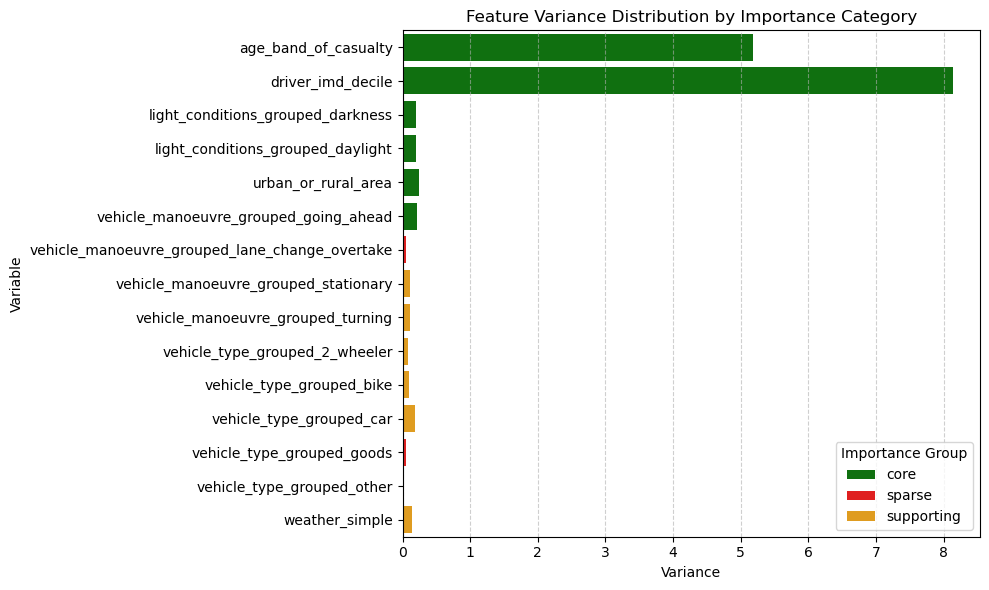

In [331]:


# 提取前缀（用于同组变量放一起）
def extract_variable_group(name):
    match = re.match(r'^([a-z_]+?_grouped)', name)
    return match.group(1) if match else name

importance_df['Group'] = importance_df['Variable'].apply(extract_variable_group)
importance_df_sorted = importance_df.sort_values(by=['Group', 'Variable']).reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df_sorted,
    x='Variance',
    y='Variable',
    hue='Importance_Group',
    dodge=False,
    palette={'core': 'green', 'supporting': 'orange', 'sparse': 'red'}
)
plt.title('Feature Variance Distribution by Importance Category')
plt.xlabel('Variance')
plt.ylabel('Variable')
plt.legend(title='Importance Group')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [365]:
merge_encoded = merged_all.select_dtypes(exclude='object')

In [366]:
merge_encoded.head()

,age_band_of_casualty,driver_imd_decile,urban_or_rural_area,accident_severity,weather_simple,vehicle_type_grouped_2_wheeler,vehicle_type_grouped_bike,vehicle_type_grouped_car,vehicle_type_grouped_goods,vehicle_type_grouped_other,vehicle_manoeuvre_grouped_going_ahead,vehicle_manoeuvre_grouped_lane_change_overtake,vehicle_manoeuvre_grouped_stationary,vehicle_manoeuvre_grouped_turning,light_conditions_grouped_darkness,light_conditions_grouped_daylight
3,5,3,1,3.0,0,False,False,True,False,False,True,False,False,False,True,False
5,10,3,1,2.0,0,False,False,True,False,False,True,False,False,False,True,False
6,8,3,1,3.0,0,False,False,True,False,False,True,False,False,False,True,False
7,4,3,1,3.0,0,False,False,True,False,False,True,False,False,False,True,False
8,4,4,1,3.0,0,False,False,True,False,False,True,False,False,False,True,False


In [343]:
#聚类分析
columns_to_exclude = [
    'cluster',                    # 聚类结果列（防止泄露）
    'accident_severity',              # 如果有未编码的文本列
    # 其他不希望用于聚类的列
]

X = merge_encoded.drop(columns=columns_to_exclude,errors='ignore')

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 聚类
kmeans = MiniBatchKMeans(n_clusters=5, batch_size=10000, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 添加回原表
merge_encoded['cluster'] = clusters

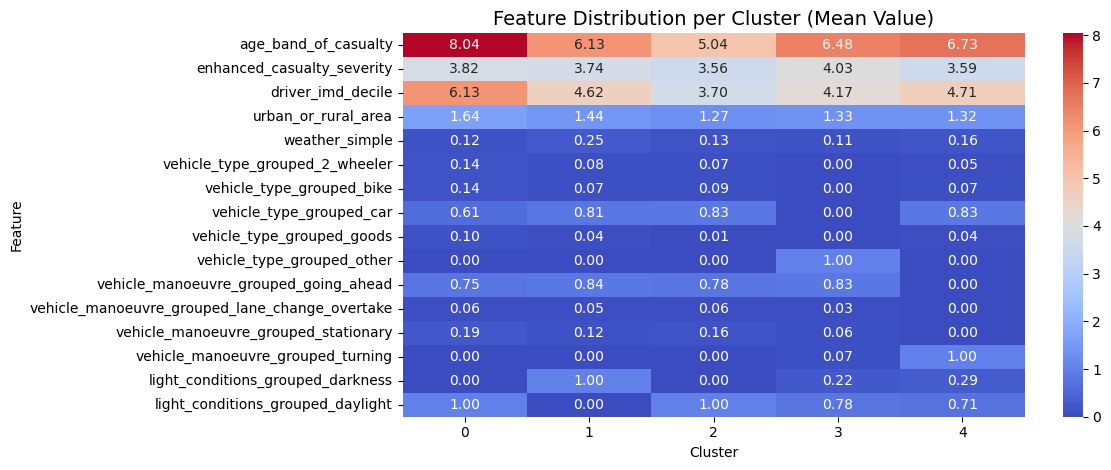

In [348]:
# ✅ 1. 创建副本，避免原数据被修改
df = merge_encoded.copy()

# ✅ 2. 将布尔列（One-Hot 后可能为 True/False）转成 0/1 整数
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# ✅ 3. 指定排除列（例如目标变量）
exclude_cols = ['accident_severity']
feature_cols = [col for col in df.columns if col not in exclude_cols and col != 'cluster']

# ✅ 4. 只保留数值型列
numeric_cols = df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

# ✅ 5. 计算每个 cluster 的每个变量均值
cluster_summary = df.groupby('cluster')[numeric_cols].mean()

# ✅ 6. 可视化热力图（每行是变量，每列是聚类）
plt.figure(figsize=(12, len(cluster_summary.columns) * 0.3))
sns.heatmap(cluster_summary.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Feature Distribution per Cluster (Mean Value)", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [345]:
# 交叉表：聚类编号 vs 严重事故比率
cluster_vs_severity = pd.crosstab(
    merge_encoded['cluster'],
    merge_encoded['accident_severity'],
    normalize='index'
)
cluster_vs_severity.columns = ['Fatal', 'Serious', 'Slight']


#cluster_vs_severity.to_csv("cluster_vs_severity_distribution.csv", index=True)



🔍 原始类别分布：
accident_severity
3.0    108972
2.0     41129
1.0      3608
Name: count, dtype: int64

✅ SMOTE后训练集分布：
accident_severity
3.0    76280
2.0    76280
1.0    76280
Name: count, dtype: int64

📊 分类报告（SMOTE平衡后）：
              precision    recall  f1-score   support

         1.0       0.05      0.60      0.09      1082
         2.0       0.37      0.27      0.31     12339
         3.0       0.79      0.56      0.65     32692

    accuracy                           0.48     46113
   macro avg       0.40      0.48      0.35     46113
weighted avg       0.66      0.48      0.55     46113



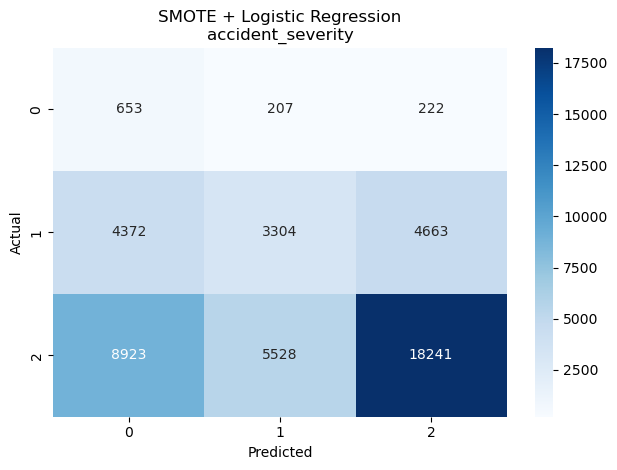

In [180]:
# 🎯 选择目标变量
target = 'accident_severity'

# 🚫 移除所有因变量 + 非特征列
X = merge_encoded.drop(columns=['accident_severity', 'enhanced_casualty_severity', 'cluster'], errors='ignore')
y = merge_encoded[target]

# 📊 原始分布
print("🔍 原始类别分布：")
print(y.value_counts())

# ✂️ 拆分训练/测试集（先分，再对训练集做 SMOTE）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ✅ SMOTE 过采样
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# 🔍 新训练集分布
print("\n✅ SMOTE后训练集分布：")
print(pd.Series(y_train_smote).value_counts())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# ✅ 4️⃣ 拟合逻辑回归（增大 max_iter，使用标准化后的数据）
model = LogisticRegression(
    max_iter=3000,
    solver='lbfgs',
    class_weight='balanced'
)
model.fit(X_train_scaled, y_train_smote)

# 5️⃣ 测试集预测与评估
y_pred = model.predict(X_test_scaled)

# 📋 分类报告
print("\n📊 分类报告（SMOTE平衡后）：")
print(classification_report(y_test, y_pred, zero_division=0))

# 🔵 混淆矩阵
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'SMOTE + Logistic Regression\n{target}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

原始类别分布：
accident_severity
3.0    108972
2.0     41129
1.0      3608
Name: count, dtype: int64

SMOTE后训练集分布：
accident_severity
3.0    76280
2.0    76280
1.0    76280
Name: count, dtype: int64

📊 分类报告（RandomForest + SMOTE）：
              precision    recall  f1-score   support

         1.0       0.04      0.51      0.08      1082
         2.0       0.33      0.34      0.33     12339
         3.0       0.78      0.50      0.61     32692

    accuracy                           0.46     46113
   macro avg       0.39      0.45      0.34     46113
weighted avg       0.65      0.46      0.53     46113



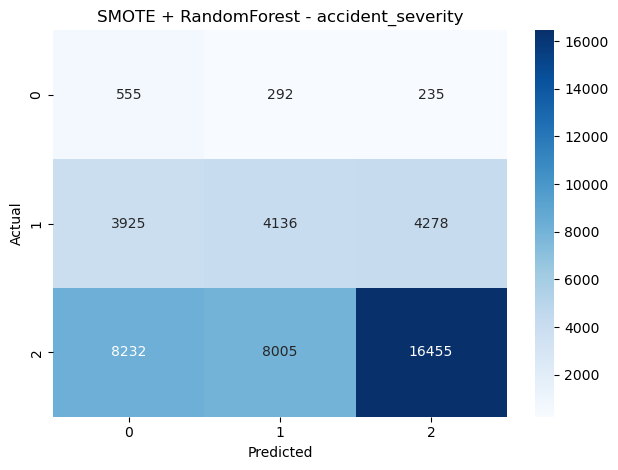

In [181]:
# Random Forest
target = 'accident_severity'

# ❌ 去除因变量和非特征列
X = merge_encoded.drop(columns=['enhanced_casualty_severity', 'accident_severity', 'cluster'], errors='ignore')
y = merge_encoded[target]

# 📊 原始类别分布
print("原始类别分布：")
print(y.value_counts())

# ✂️ 拆分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ✅ SMOTE 平衡训练集
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 🔍 新训练集分布
print("\nSMOTE后训练集分布：")
print(pd.Series(y_train_smote).value_counts())

# 🌲 训练随机森林模型
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',  # 加权防止主类主导
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_smote, y_train_smote)

# 🧪 预测与评估
y_pred = rf.predict(X_test)

print("\n📊 分类报告（RandomForest + SMOTE）：")
print(classification_report(y_test, y_pred, zero_division=0))

# 🔲 混淆矩阵
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'SMOTE + RandomForest - {target}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

原始二分类分布：
 accident_severity
0    108972
1     44737
Name: count, dtype: int64

SMOTE后训练集分布：
 accident_severity
1    76280
0    76280
Name: count, dtype: int64

 分类报告（XGBoost - Binary）：
                precision    recall  f1-score   support

Non-Severe (0)       0.80      0.40      0.53     32692
    Severe (1)       0.34      0.76      0.47     13421

      accuracy                           0.50     46113
     macro avg       0.57      0.58      0.50     46113
  weighted avg       0.67      0.50      0.51     46113



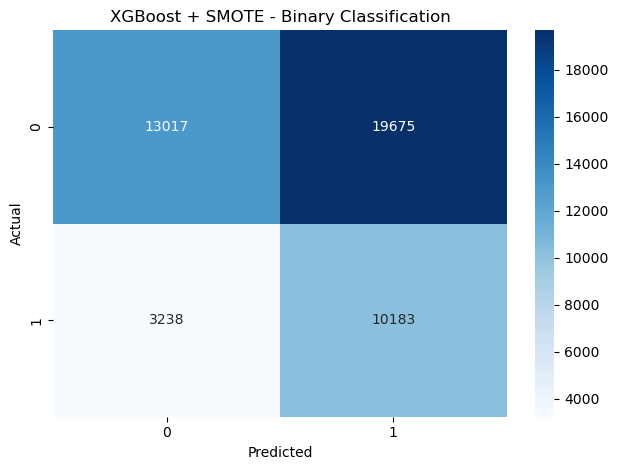

In [260]:
#XGBoost：accident_severity
# ✅ 1. 二分类标签合并
# 原始标签：1=Fatal, 2=Serious, 3=Slight
# 合并：1 or 2 → 1（严重事故），3 → 0（非严重）
y_binary = merge_encoded['accident_severity'].map(lambda x: 1 if x in [1, 2] else 0)

# ✅ 2. 自变量准备（剔除因变量和无关列）
X = merge_encoded.drop(columns=['accident_severity', 'enhanced_casualty_severity', 'cluster'], errors='ignore')

# 🔍 3. 类别分布前后对比
print("原始二分类分布：\n", y_binary.value_counts())

# ✅ 4. 划分训练和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, stratify=y_binary, random_state=42
)

# ✅ 5. SMOTE 过采样处理训练集（平衡正负样本）
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nSMOTE后训练集分布：\n", pd.Series(y_train_smote).value_counts())

# ✅ 6. XGBoost 建模（根据optuna结果调整）
xgb_binary = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=172,
    learning_rate=0.11832689627661665,
    max_depth=10,
    subsample=0.9220102120356692,
    colsample_bytree=0.8438324580253044,
    random_state=42
)


xgb_binary.fit(X_train_smote, y_train_smote)

# 🧠 用概率预测，而不是直接predict
y_prob = xgb_binary.predict_proba(X_test)[:, 1]  # 获取预测为“严重事故”的概率

# ✅ 手动设定分类阈值（默认是 0.5）

threshold = 0.404
y_pred = (y_prob > threshold).astype(int)


# 📋 分类报告
print("\n 分类报告（XGBoost - Binary）：")
print(classification_report(y_test, y_pred, target_names=['Non-Severe (0)', 'Severe (1)']))

# 🔲 混淆矩阵可视化
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost + SMOTE - Binary Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

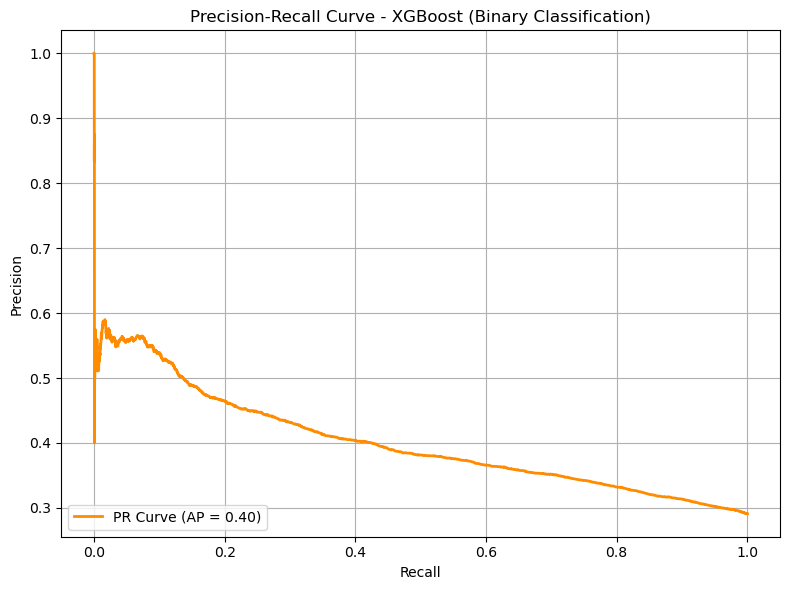

In [258]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# 2. 可视化曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost (Binary Classification)")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()

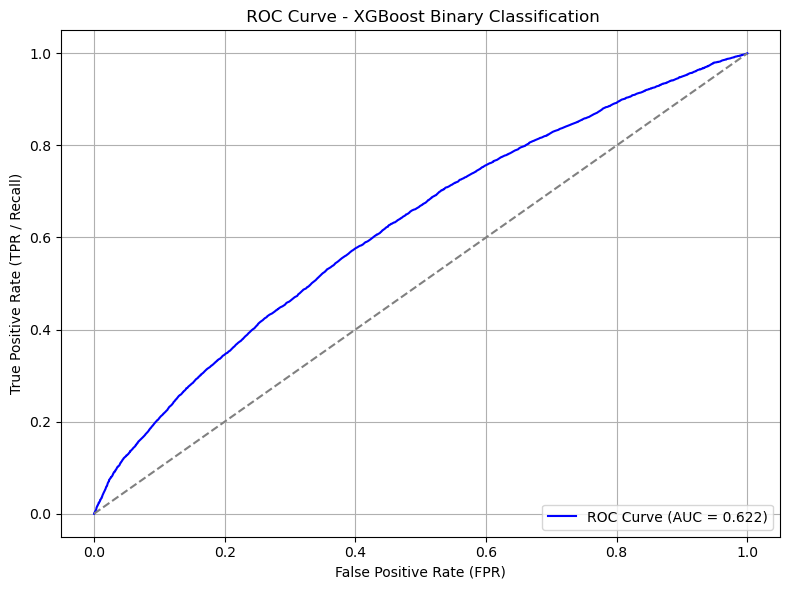

 最佳分类阈值（F1 最大）: 0.404
 对应的 F1 分数: 0.471
 AUC: 0.622


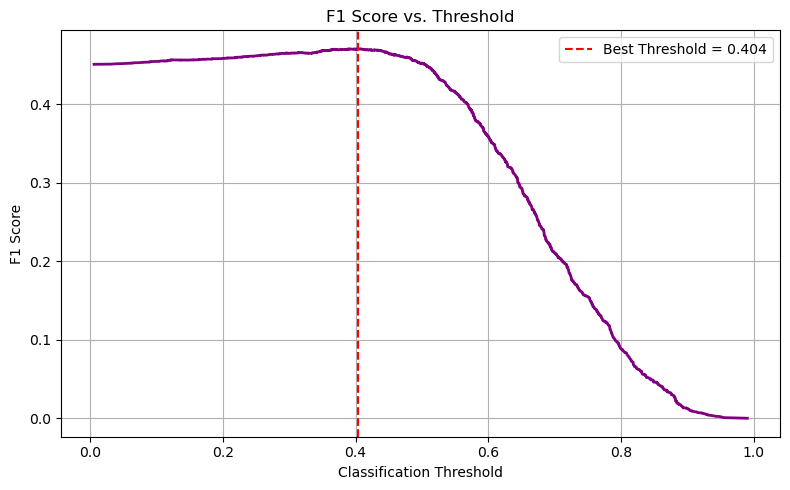

In [259]:
# === ROC 曲线 ===
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)  # ✅ 计算 AUC

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR / Recall)")
plt.title(" ROC Curve - XGBoost Binary Classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall + F1分析 ===
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

# ✅ 输出最佳阈值
print(f" 最佳分类阈值（F1 最大）: {best_threshold:.3f}")
print(f" 对应的 F1 分数: {best_f1:.3f}")
print(f" AUC: {roc_auc:.3f}")  # ✅ 打印 AUC 分数

# === 画 F1 vs 阈值 曲线 ===
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores[:-1], color='purple', lw=2)
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.3f}')
plt.xlabel("Classification Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


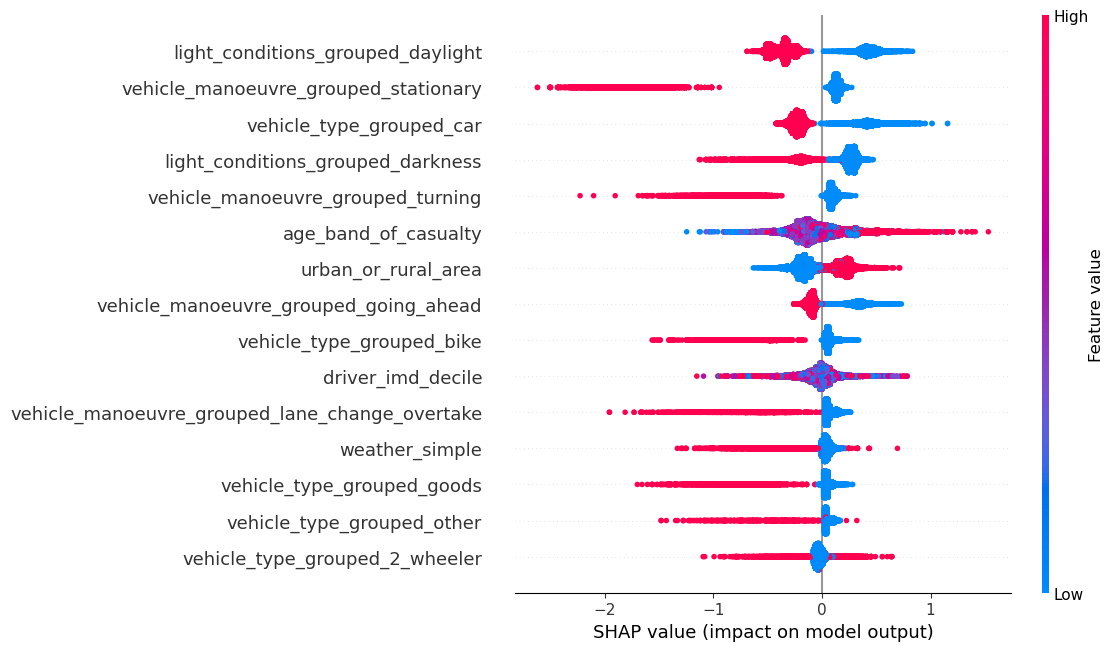

In [367]:
# 创建 explainer（适配 XGBoost）
explainer = shap.Explainer(xgb_binary)
shap_values = explainer(X_test)

# 全局解释图：哪些特征最影响预测
shap.plots.beeswarm(shap_values, max_display=15)

In [256]:
#Optuna 进行 XGBoost 的自动化调参
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    model = XGBClassifier(
        max_depth=trial.suggest_int('max_depth', 3, 10),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        n_estimators=trial.suggest_int('n_estimators', 100, 300),
        subsample=trial.suggest_float('subsample', 0.6, 1.0),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.6, 1.0),
        eval_metric='logloss',
        random_state=42
    )
    
    score = cross_val_score(model, X_train_smote, y_train_smote, cv=3, scoring='f1', n_jobs=-1)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 输出最佳参数
print("✅ 最佳参数组合：", study.best_params)
print("📊 最佳平均 F1 分数：", study.best_value)


[I 2025-04-19 22:40:18,930] A new study created in memory with name: no-name-3d83157f-0e67-4356-a845-69b8b2d46829
[I 2025-04-19 22:40:27,410] Trial 0 finished with value: 0.6317912825602122 and parameters: {'max_depth': 7, 'learning_rate': 0.10663994341931915, 'n_estimators': 215, 'subsample': 0.7699415491602536, 'colsample_bytree': 0.805418842957015}. Best is trial 0 with value: 0.6317912825602122.
[I 2025-04-19 22:40:33,100] Trial 1 finished with value: 0.6323510045919487 and parameters: {'max_depth': 8, 'learning_rate': 0.23010961277293482, 'n_estimators': 110, 'subsample': 0.9263815082280888, 'colsample_bytree': 0.6656483999101083}. Best is trial 1 with value: 0.6323510045919487.
[I 2025-04-19 22:40:40,032] Trial 2 finished with value: 0.6283283725557822 and parameters: {'max_depth': 4, 'learning_rate': 0.17676898062601318, 'n_estimators': 273, 'subsample': 0.911687262276596, 'colsample_bytree': 0.7532530301719526}. Best is trial 1 with value: 0.6323510045919487.
[I 2025-04-19 22:4

✅ 最佳参数组合： {'max_depth': 10, 'learning_rate': 0.11832689627661665, 'n_estimators': 172, 'subsample': 0.9220102120356692, 'colsample_bytree': 0.8438324580253044}
📊 最佳平均 F1 分数： 0.6395262365587597


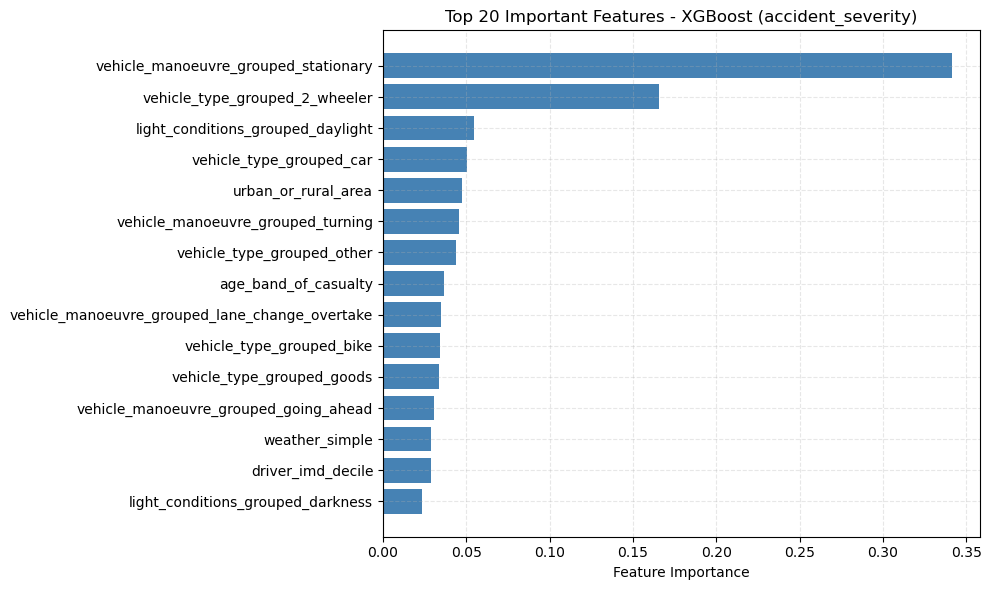

In [262]:
# ✅ 获取特征名称（顺序与训练时一致）
feature_names = X.columns.tolist()

# ✅ 获取特征重要性（模型已训练好）
importances = xgb_binary.feature_importances_

# ✅ 构建 DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# ✅ 按重要性降序排列
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# ✅ 可视化前 N 个特征
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Importance'][:top_n][::-1], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (XGBoost - Binary Classification)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()